In [19]:
import graphviz
import json
import numpy as np
%matplotlib inline

In [10]:
ontology_file = '/Users/athair/Git/lightserv_dj_demo/lightserv/data/allen_ontology.json'
with open(ontology_file) as json_file:
    data = json.load(json_file)
    
test_ontology_file = '/Users/athair/Git/lightserv_dj_demo/lightserv/data/test_ontology.json'
with open(test_ontology_file) as json_file:
    test_ontology_dict = json.load(json_file)

In [79]:
def test_expand_graph(dic=test_ontology_dict,graph=my_test_graph,input_nodename=None):
    """ 
    ---PURPOSE---
    Take an existing graph and add to it the children 
    of an input_nodename. Recursive function.
    ---INPUT---
    dic             Dictionary representing the entire ontology graph (with "rank" key included)
    graph           The graphviz graph object that will be updated.
                    graph may be a subgraph of the entire graph as long as 
                    input_nodename is a node name in it
    input_nodename  The name of the node whose children you want to display
    """
    name = dic.get('name')
#     print(name)
    children = dic.get('children')
    if input_nodename == None: # default is root
        graph.node('root')
        return graph
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            graph.node(child_name)
            graph.edge(name,child_name)
        return graph
     
    for child in children:
        test_expand_graph(child,graph,input_nodename=input_nodename)
    return graph

In [99]:
def test_contract_graph(dic=test_ontology_dict,graph=my_test_graph,input_nodename=None):
    """ 
    ---PURPOSE---
    Take an existing graph and remove all descendents
    of an input_nodename. Recursive function.
    ---INPUT---
    dic             Dictionary representing the entire ontology graph (with "rank" key included)
    graph           The graphviz graph object that will be updated.
                    graph may be a subgraph of the entire graph as long as 
                    input_nodename is a node name in it
    input_nodename  The name of the node whose descendents you want to remove
    """
    name = dic.get('name')
    name_label = f'"{name}"' if len(name.split())>1 else name
    children = dic.get('children')
    if name == input_nodename:
        for child in children: # child is a dict
            child_name = child.get('name')
            child_label = f'"{child_name}"' if len(child_name.split())>1 else child_name

            edge_str = f'\t{name_label} -> {child_label}' 
#             print(edge_st/r)
            # delete edges to children and children themselves
            child_str = f'\t{child_label}'

            del graph.body[graph.body.index(edge_str)]
            del graph.body[graph.body.index(child_str)]
            print("deleted %s" % child_str)
            print("deleting %s" % edge_str)
            test_contract_graph(child,graph,input_nodename=child_name)
    for child in children:
        test_contract_graph(child,graph,input_nodename=input_nodename)
    return graph

deleted 	"Basic cell groups and regions"
deleting 	root -> "Basic cell groups and regions"
deleted 	Cerebrum
deleting 	root -> Cerebrum
deleted 	"Cerebral cortex"
deleting 	Cerebrum -> "Cerebral cortex"
deleted 	"Cortical plate"
deleting 	Cerebrum -> "Cortical plate"


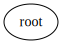

In [102]:
my_test_graph = graphviz.Digraph(strict=True)
# my_test_graph.attr('node',shape='box')
graph=test_expand_graph(graph=my_test_graph)
graph=test_expand_graph(graph=graph,input_nodename='root')
graph=test_expand_graph(graph=graph,input_nodename='Cerebrum')
graph = test_contract_graph(graph=graph,input_nodename='root')
# print(graph.body)
# graph=test_expand_graph(graph=graph,input_nodename='Cerebrum')
graph

In [103]:
pwd

'/Users/athair/Git/lightserv_dj_demo/notebooks'